In [13]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 10

%matplotlib inline

In [14]:
sales = pd.read_csv("data/5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


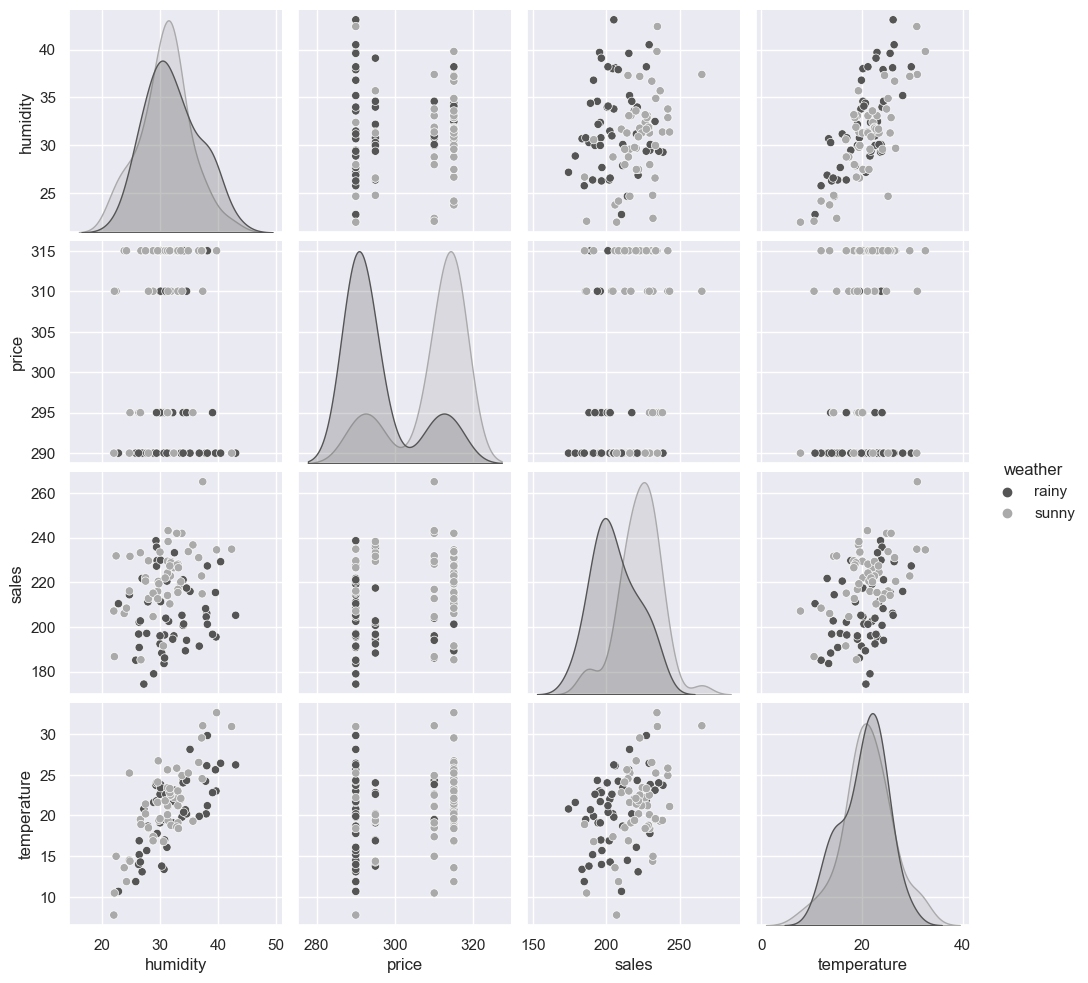

In [15]:
sns.pairplot(data=sales, hue='weather', palette='gray')

In [16]:
lm_dame = smf.ols("sales~ price",sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [17]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


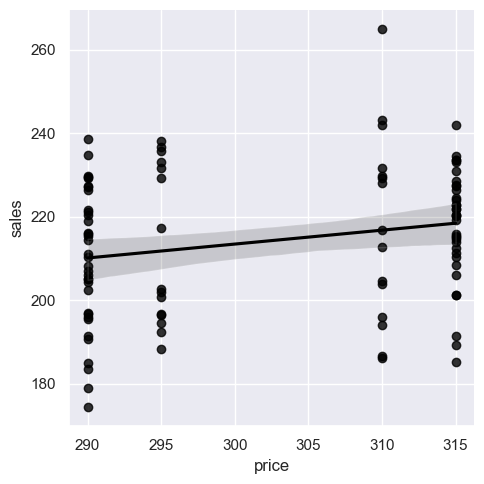

In [18]:
sns.lmplot(x="price", y= "sales", data=sales,
           scatter_kws = {"color":"black"},
           line_kws = {"color":"black"})

In [19]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


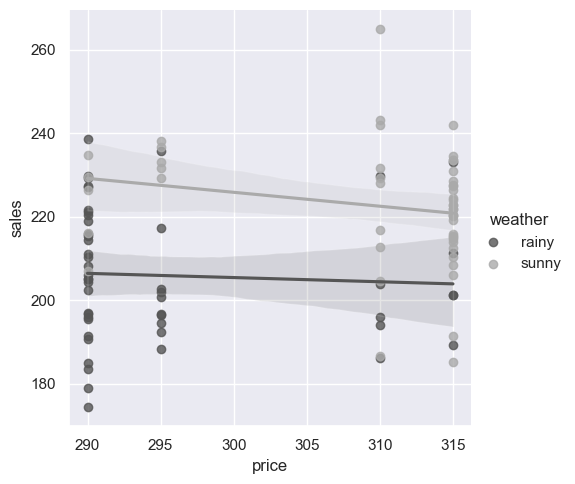

In [20]:
sns.lmplot(x="price", y= "sales", data=sales,
           hue= "weather", palette= 'gray'
)

In [23]:
#5.3.5 복수의 독립변수를 가지는 모델
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales).fit()

lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [25]:
#5.3.6 나쁜분석의 예: 일반적인 분산분석 검정

In [27]:
print(sm.stats.anova_lm(lm_sales, typ =1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [29]:
# 5.3.7 회귀계수의 t검정 - 문제가 일어나지 않음
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [30]:
#5.3.9 모델선택과 분산분석

# Null 모델의 잔차제곱합
mod_null = smf.ols("sales ~1", sales).fit()
resid_sq_null = sp.sum(mod_null.resid**2)
resid_sq_null

C:\Users\tomat\AppData\Local\Temp\ipykernel_8788\881617918.py:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  resid_sq_null = sp.sum(mod_null.resid**2)


28968.5259000000

In [32]:
mod_1 = smf.ols("sales~ weather",sales).fit()
resid_sq_1 = np.sum(mod_1.resid**2)
resid_sq_1

21917.5650000000

In [33]:
resid_sq_null - resid_sq_1

7050.9609000000

In [34]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [35]:
#5.3.10 type II ANOVA와 수정제곱합

mod_full = smf.ols(
    "sales~ weather + humidity + temperature + price",
    sales).fit()
resid_sq_full = np.sum(mod_full.resid**2)
resid_sq_full

17242.7169423665

In [38]:
mod_non_humi = smf.ols("sales~ weather + temperature+price", sales).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid**2)
resid_sq_non_humi

17299.1420161077

In [39]:
 print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [40]:
mod_full.compare_f_test(mod_non_humi) # F비의 크기가 작다. 오차의 크기에 비해 습도에 의한 효과의 크기가 작고
#  p값이 매우 크므로 유의미한 차이가 있다고할수없다.

(0.3108780376, 0.5784533427, 1.0000000000)

In [41]:
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [42]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

In [44]:
print("모든 변수를 포함한 모델:", mod_full.aic.round(3))
print("습도를 제외한 모델:", mod_non_humi.aic.round(3))

모든 변수를 포함한 모델: 808.785
습도를 제외한 모델: 807.112
